### Case Study


Di dalam bisnis perhotelan, memastikan ketersediaan kamar hotel di suatu waktu dan untuk beberapa waktu yang akan datang sangat penting dalam mengoptimalkan pendapatan. Informasi mengenai ketersediaan kamar yang akurat dan aktual dapat menghindarkan hotel dari berbagai kerugian, semisal kerugian yang disebabkan oleh tamu yang membatalkan pesanan atau tidak melakukan check in di waktu kedatangannya.
Tamu yang membatalkan penginapannya, baik setelah mengabari pihak hotel terlebih dahulu (misalkan menghubungi sendiri atau dihubungi pihak hotel) maupun tidak, menyebabkan kekosongan kamar yang seharusnya mereka inapi. Kamar-kamar ini sebenarnya masih dapat disewakan kembali ke tamu yang lainnya, namun akan lebih sulit untuk memutuskan dengan segera kamar mana saja yang dapat disewakan kembali apabila kabar pembatalan oleh tamu diterima pihak hotel secara mendadak, semisal beberapa saat sebelum waktu check in.

### 1. Problem Framing

**Business objective** yang akan dicapai pada case study ini yaitu memaksimalkan ocupansi kamar hotel agar digunakan oleh orang yang sudah booking/pesan dengan tidak membatalkan kamar yang telah dipesan. karena akan sangat berpengaruh terhadap revenue dari pemilik hotel dan 
rantai yang terlibat dari bisnis perhotelan seperti makanan, ketersediaan consumable produk seperti : sikat gigi, odol, sabun madni dll. 

**Output dari machine** learning ini yaitu memperdiksi apakah end user akan membatalkan booking atau tidak

**Machine learning** yang digunakan dalam kasus ini adalah binary classification : Liear regression, Knn, dan RandomForrest, dikarenakan hanya ada dua opsi yaitu mencancel atau tidak, serta tingkatan model machine learning dari yang paling sederhana 

**Perfomnce meassure** yang digunakan pada kasus machine learning ini adalah f1 score, recall, dan precission

**Resiko** yang mungkin diakibatkan dari kesalahan pemodelan yaitu, false negatif dalam prediksi

#### Import Libary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import datetime

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder,LabelEncoder

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import missingno 

from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score,StratifiedKFold, KFold, GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


### 2.EDA 

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
#Read Dataset
df = pd.read_csv('hotel_bookings.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

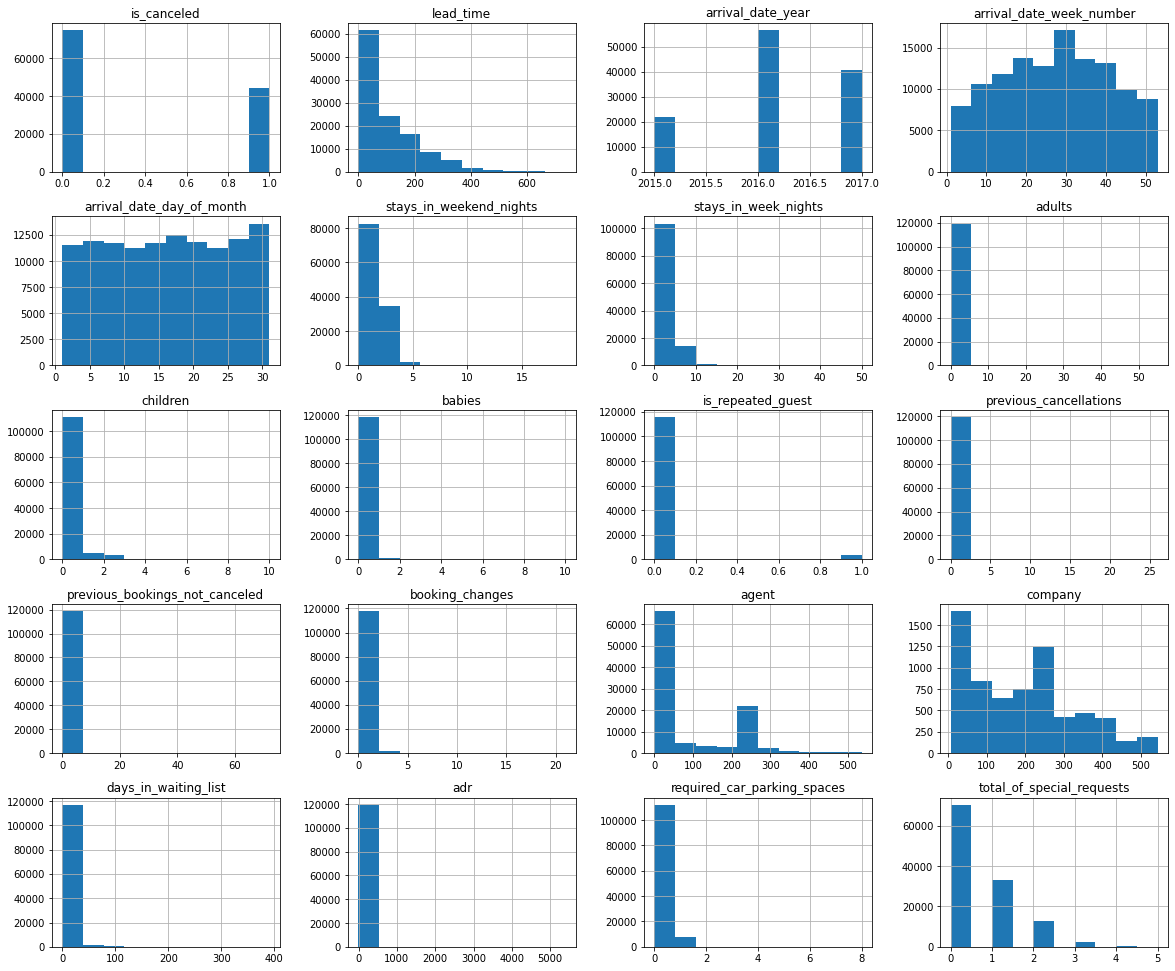

In [ ]:
df.hist(figsize=(20,17))
plt.show()

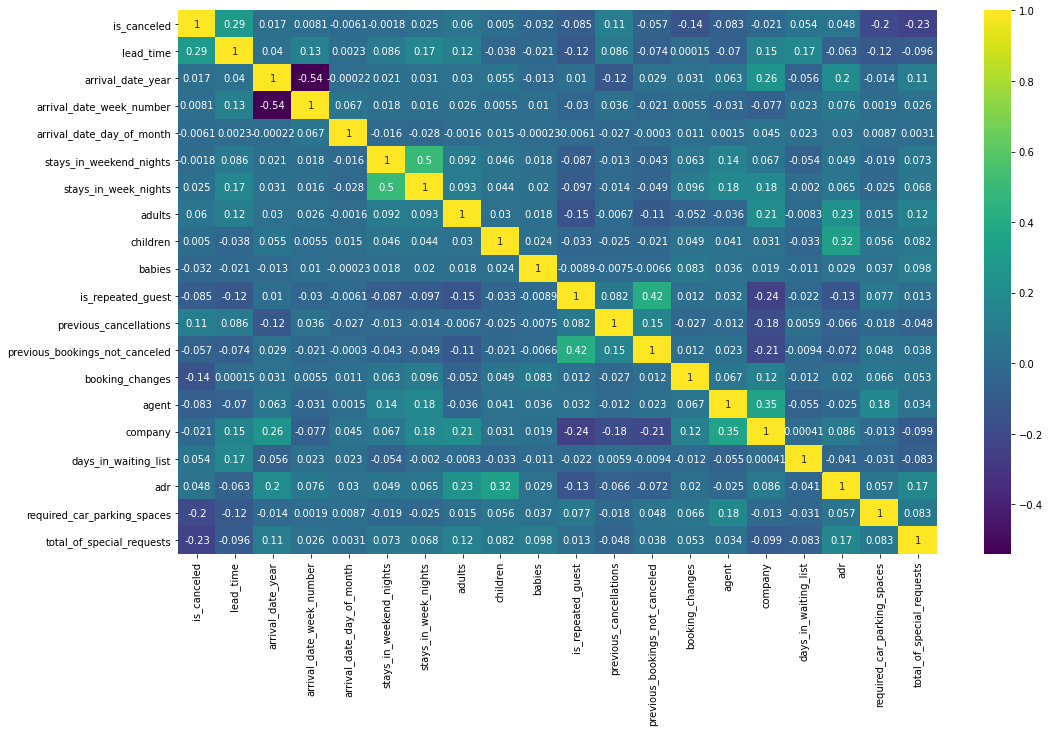

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis')
plt.show()

In [ ]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

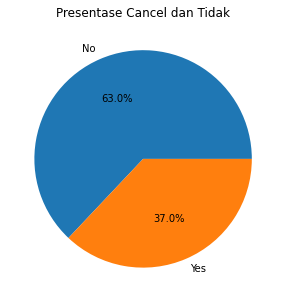

In [ ]:
#Presentase cancel hotel secara keseluruhan
plt.figure(figsize=(10,5))
plt.title('Presentase Cancel dan Tidak')
plt.pie(df['is_canceled'].value_counts(),labels=('No','Yes'),autopct="%.1f%%")
plt.show()


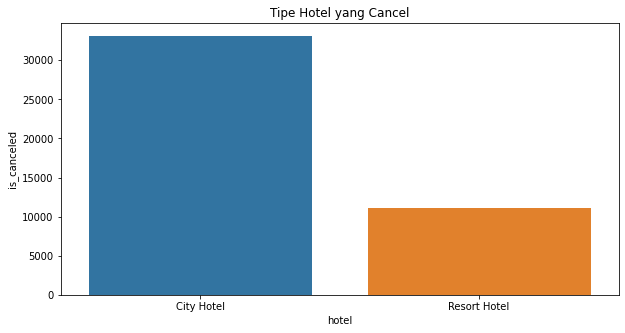

In [ ]:
#Tipe Hotel yang paling banyak Cancel
hotel = df.groupby('hotel',as_index=False)['is_canceled'].sum()

plt.figure(figsize=(10,5))
plt.title('Tipe Hotel yang Cancel')
sns.barplot(x='hotel',y='is_canceled',data=hotel)
plt.show()

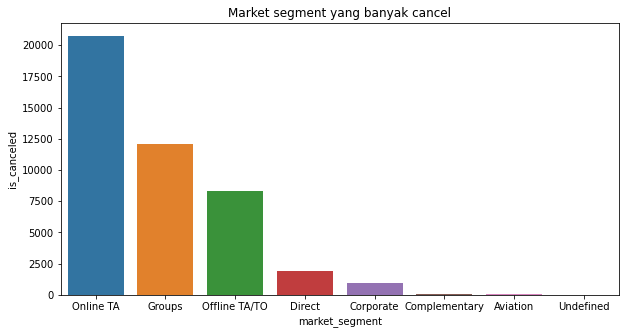

In [ ]:
#Market segment yang melakukan cancel
market = df.groupby('market_segment',as_index=False)['is_canceled'].sum()
market = market.sort_values(by='is_canceled',ascending=False)

plt.figure(figsize=(10,5))
plt.title('Market segment yang banyak cancel')
sns.barplot(x='market_segment',y='is_canceled',data=market)
plt.show()

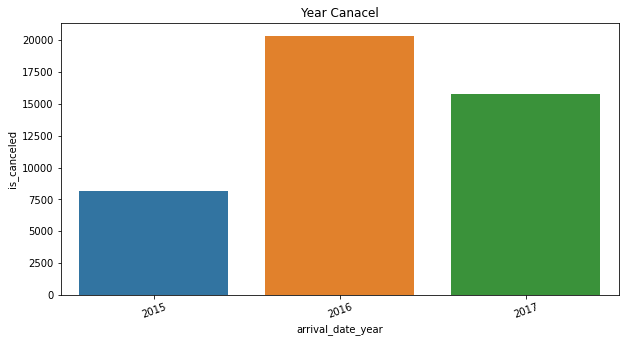

In [ ]:
year= df.groupby('arrival_date_year',as_index=False)['is_canceled'].sum()
year= year.sort_values(by='is_canceled',ascending=False)

plt.figure(figsize=(10,5))
plt.title('Year Canacel')
sns.barplot(x='arrival_date_year',y='is_canceled',data=year)
plt.xticks(rotation=20)
plt.show()

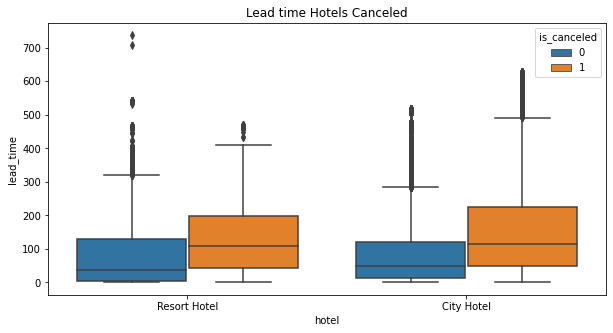

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Lead time Hotels Canceled')
sns.boxplot(y='lead_time',x='hotel',data=df, hue='is_canceled')
plt.show()

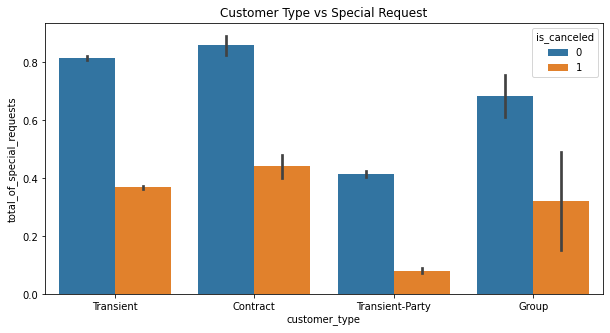

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Customer Type vs Special Request')
sns.barplot(y='total_of_special_requests',x='customer_type',data=df, hue='is_canceled')
plt.show()

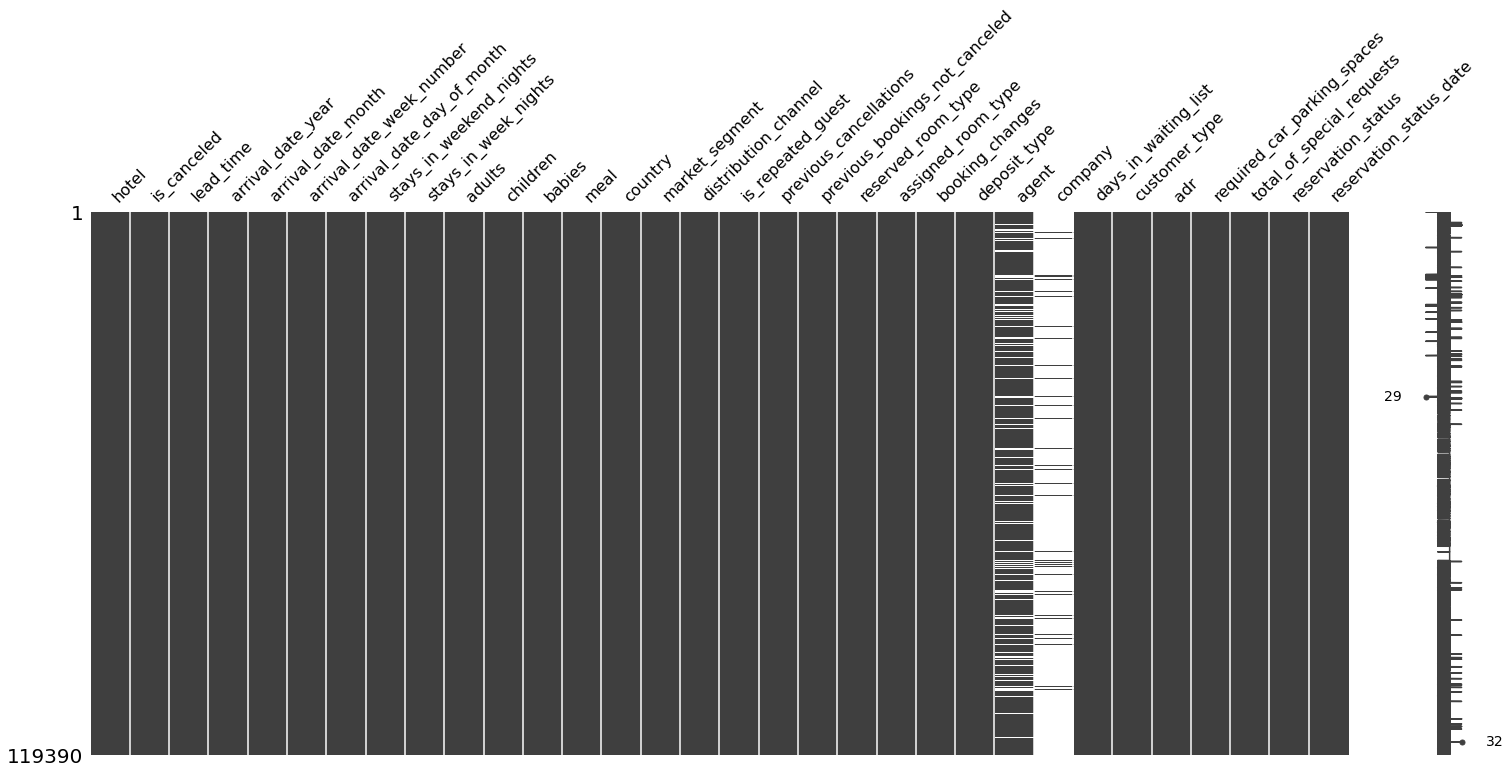

In [ ]:
missingno.matrix(df)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

feature yang dignakan yaiitu yang memiliki corelasi terhadap canacel lebih dari 0.1 : 
yaitu : 
* lead_time
* total_of_special_requests
* required_car_parking_spaces
* booking_changes 
* previous_cancellations 

### 3.Data Preparation

Handling Missing Value and Uncorralted data

In [ ]:
drop_col = drop_col = ['is_repeated_guest','agent','adults','previous_bookings_not_canceled','days_in_waiting_list','adr','babies','stays_in_week_nights','company','arrival_date_year','arrival_date_week_number','arrival_date_day_of_month','children','stays_in_weekend_nights','company','country','reservation_status','assigned_room_type']
df.drop(columns=drop_col,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   hotel                        119390 non-null  object
 1   is_canceled                  119390 non-null  int64 
 2   lead_time                    119390 non-null  int64 
 3   arrival_date_month           119390 non-null  object
 4   meal                         119390 non-null  object
 5   market_segment               119390 non-null  object
 6   distribution_channel         119390 non-null  object
 7   previous_cancellations       119390 non-null  int64 
 8   reserved_room_type           119390 non-null  object
 9   booking_changes              119390 non-null  int64 
 10  deposit_type                 119390 non-null  object
 11  customer_type                119390 non-null  object
 12  required_car_parking_spaces  119390 non-null  int64 
 13  total_of_speci

Memisahkan data Numerical untuk melakukan proses scaling data

In [ ]:
#Memisahkan data numerical 
df_num = df.select_dtypes(exclude='object')
df_num

,is_canceled,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0,342,0,3,0,0
1,0,737,0,4,0,0
2,0,7,0,0,0,0
3,0,13,0,0,0,0
4,0,14,0,0,0,1
...,...,...,...,...,...,...
119385,0,23,0,0,0,0
119386,0,102,0,0,0,2
119387,0,34,0,0,0,4
119388,0,109,0,0,0,0


Memisahkan data kategorikal untuk melakukan proses encoding data

In [ ]:
#Memisahkan data categorical
df_cat = df.select_dtypes(include='object')
df_cat

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03
...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017-09-06
119386,City Hotel,August,BB,Online TA,TA/TO,E,No Deposit,Transient,2017-09-07
119387,City Hotel,August,BB,Online TA,TA/TO,D,No Deposit,Transient,2017-09-07
119388,City Hotel,August,BB,Online TA,TA/TO,A,No Deposit,Transient,2017-09-07


In [ ]:
# melihat unique data pada setiap features categorical

for i in df_cat.columns:
    print(i)
    print(df_cat[i].value_counts())
    print('\n')

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P    

In [ ]:
# melihat unique data pada setiap features categorical

for i in df_cat.columns:
    print(i)
    print(df_cat[i].unique())
    print('\n')

hotel
['Resort Hotel' 'City Hotel']


arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


meal
['BB' 'FB' 'HB' 'SC' 'Undefined']


market_segment
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


distribution_channel
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


reserved_room_type
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


deposit_type
['No Deposit' 'Refundable' 'Non Refund']


customer_type
['Transient' 'Contract' 'Transient-Party' 'Group']


reservation_status_date
['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02'
 '2015-07-13' '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18'
 '2015-06-12' '2015-06-09' '2015-05-26' '2015-07-11' '2015

Merubah data reservation date, tahun, bulan, hari

In [ ]:
df_cat['reservation_status_date'] = pd.to_datetime(df_cat['reservation_status_date'])

df_cat['year'] = df_cat['reservation_status_date'].dt.year
df_cat['month'] = df_cat['reservation_status_date'].dt.month
df_cat['day'] = df_cat['reservation_status_date'].dt.day

In [ ]:
df_cat.drop(columns=['reservation_status_date','arrival_date_month'],axis=1,inplace=True)

In [ ]:
df_cat

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,BB,Offline TA/TO,TA/TO,A,No Deposit,Transient,2017,9,6
119386,City Hotel,BB,Online TA,TA/TO,E,No Deposit,Transient,2017,9,7
119387,City Hotel,BB,Online TA,TA/TO,D,No Deposit,Transient,2017,9,7
119388,City Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2017,9,7


Encoding & Scalling

Ordinal Encoder
Dari data categorikal yang cocok menggunakan ordinal encoder yaitu : 

* Hotel
* reserved_room_type
* deposit_type
* customer_type
* year

Data categorikal diatas menunjukan tingkatan/hiraki



In [ ]:
df_cat['hotel'] = df['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

df_cat['reserved_room_type'] = df_cat['reserved_room_type'].map({'C' :0, 'A' : 1, 'D' : 2, 'E':3, 'G':4, 'F':5, 'H':6, 'L':7, 'P':8, 'B':9})

df_cat['deposit_type'] = df_cat['deposit_type'].map({'No Deposit':0, 'Refundable':1, 'Non Refund':2})

df_cat['customer_type'] = df_cat['customer_type'].map({'Transient':0, 'Contract':1, 'Transient-Party':2, 'Group':3})


df_cat['year'] = df_cat['year'].map({2015:0, 2014:1, 2016:2, 2017:3})

In [ ]:
df_cat.shape

(119390, 10)

In [ ]:
df_ordinal = df_cat.select_dtypes(exclude='object')

In [ ]:
df_ordinal

,hotel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,7,1
1,0,0,0,0,0,7,1
2,0,1,0,0,0,7,2
3,0,1,0,0,0,7,2
4,0,1,0,0,0,7,3
...,...,...,...,...,...,...,...
119385,1,1,0,0,3,9,6
119386,1,3,0,0,3,9,7
119387,1,2,0,0,3,9,7
119388,1,1,0,0,3,9,7


In [ ]:
df_ordinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   hotel               119390 non-null  int64
 1   reserved_room_type  119390 non-null  int64
 2   deposit_type        119390 non-null  int64
 3   customer_type       119390 non-null  int64
 4   year                119390 non-null  int64
 5   month               119390 non-null  int64
 6   day                 119390 non-null  int64
dtypes: int64(7)
memory usage: 6.4 MB


One Hot

One Hot 
Dari data categorikal yang cocok menggunakan one Hot Encoder yaitu : 

* meal
* market_segment
* distribution_channel

Data categorikal diatas kategorinya sangat acak



In [ ]:
#mangambil data yang belum terencode oleh binari encoder
df_enc = df_cat.select_dtypes(include='object')

In [ ]:
df_enc.columns

Index(['meal', 'market_segment', 'distribution_channel'], dtype='object')

In [ ]:
ohe = OneHotEncoder()
df_ohe = df_enc[['meal', 'market_segment', 'distribution_channel']]
df_ohe = ohe.fit_transform(df_ohe).toarray().astype('int64')
df_ohe = pd.DataFrame(df_ohe)
df_ohe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
119386,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
119387,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
119388,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Scaled

Proses scaling dilakukan untuk menormaliasi data yang range variabel nya teralalu besar antar dataset numerikal

In [ ]:
df_num.shape

(119390, 6)

In [ ]:
df_num.columns

Index(['is_canceled', 'lead_time', 'previous_cancellations', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

Dataset yang discaling kecuali is_canceled karena is_canceled merupakan target kasus machine learning ini

In [ ]:
scaler = MinMaxScaler()
df_scaled = df_num.drop(columns='is_canceled',axis=1)
df_scaled[['lead_time', 'previous_cancellations', 'booking_changes',
       'required_car_parking_spaces', 'total_of_special_requests']] = scaler.fit_transform(df_scaled)
df_scaled

,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests
0,0.464043,0.0,0.142857,0.0,0.0
1,1.000000,0.0,0.190476,0.0,0.0
2,0.009498,0.0,0.000000,0.0,0.0
3,0.017639,0.0,0.000000,0.0,0.0
4,0.018996,0.0,0.000000,0.0,0.2
...,...,...,...,...,...
119385,0.031208,0.0,0.000000,0.0,0.0
119386,0.138399,0.0,0.000000,0.0,0.4
119387,0.046133,0.0,0.000000,0.0,0.8
119388,0.147897,0.0,0.000000,0.0,0.0


In [ ]:
df_scaled.reset_index(drop=True,inplace=True)

In [ ]:
df_ordinal.reset_index(drop=True,inplace=True)

In [ ]:
df_ohe.reset_index(drop=True,inplace=True)

In [ ]:
dataset = pd.concat([df_scaled,df_ordinal,df_ohe],axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   lead_time                    119390 non-null  float64
 1   previous_cancellations       119390 non-null  float64
 2   booking_changes              119390 non-null  float64
 3   required_car_parking_spaces  119390 non-null  float64
 4   total_of_special_requests    119390 non-null  float64
 5   hotel                        119390 non-null  int64  
 6   reserved_room_type           119390 non-null  int64  
 7   deposit_type                 119390 non-null  int64  
 8   customer_type                119390 non-null  int64  
 9   year                         119390 non-null  int64  
 10  month                        119390 non-null  int64  
 11  day                          119390 non-null  int64  
 12  0                            119390 non-null  int64  
 13 

In [ ]:
dataset

,lead_time,previous_cancellations,booking_changes,required_car_parking_spaces,total_of_special_requests,hotel,reserved_room_type,deposit_type,customer_type,year,month,day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.464043,0.0,0.142857,0.0,0.0,0,0,0,0,0,7,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1.000000,0.0,0.190476,0.0,0.0,0,0,0,0,0,7,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0.009498,0.0,0.000000,0.0,0.0,0,1,0,0,0,7,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0.017639,0.0,0.000000,0.0,0.0,0,1,0,0,0,7,2,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0.018996,0.0,0.000000,0.0,0.2,0,1,0,0,0,7,3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.031208,0.0,0.000000,0.0,0.0,1,1,0,0,3,9,6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
119386,0.138399,0.0,0.000000,0.0,0.4,1,3,0,0,3,9,7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
119387,0.046133,0.0,0.000000,0.0,0.8,1,2,0,0,3,9,7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
119388,0.147897,0.0,0.000000,0.0,0.0,1,1,0,0,3,9,7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### 3.Model Training

In [ ]:
X = dataset
y = df_num['is_canceled']

In [ ]:
X.shape

(119390, 30)

In [ ]:
y.shape

(119390,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

Model Machine Learning yang dipilih merupakan model machine learning supervised binary classification yang umum digunakan, dari tingkatan model yang paling sederhana sampai ensembel
* Logistic Regression
* DecisionTree
* RandomForrest 



In [ ]:
#Pilih model
lr = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()

Predict tanpa cross validation 

In [ ]:
lr = lr.fit(X_train,y_train)
lr_y_pred = lr.predict(X_test)
print('Logistic Reggresion :',accuracy_score(y_test, lr_y_pred))

Logistic Reggresion : 0.7977775916464249


In [ ]:
dt = dt.fit(X_train,y_train)
dt_y_pred = dt.predict(X_test)
print('Decision Tree ',accuracy_score(y_test, dt_y_pred))

Decision Tree  0.802272663818857


In [ ]:
rf = rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)
print('Random Forrest:',accuracy_score(y_test, rf_y_pred))

Random Forrest: 0.8862830499483485


In [ ]:
print('Logistic Regression Report:')
print(classification_report(y_test,lr_y_pred))
print('Decision Tree Classification Report:')
print(classification_report(y_test,dt_y_pred))
print('Random Forrest Report:')
print(classification_report(y_test,rf_y_pred))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85     22496
           1       0.85      0.55      0.67     13321

    accuracy                           0.80     35817
   macro avg       0.82      0.75      0.76     35817
weighted avg       0.81      0.80      0.79     35817

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85     22496
           1       0.82      0.60      0.69     13321

    accuracy                           0.80     35817
   macro avg       0.81      0.76      0.77     35817
weighted avg       0.80      0.80      0.79     35817

Random Forrest Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22496
           1       0.89      0.79      0.84     13321

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0

Predict dengan cross validation 

In [ ]:
#Fold yang digunakan yaitu stattified 
folds = StratifiedKFold(n_splits = 5,random_state = 42)
lr_cv = cross_val_score(lr,X_train,y_train,cv=folds,scoring='accuracy').mean()
dt_cv = cross_val_score(dt,X_train,y_train,cv=folds,scoring='accuracy').mean()
rf_cv = cross_val_score(rf,X_train,y_train,cv=folds,scoring='accuracy').mean()

In [ ]:
print('Logistitic Regression Cross Val :' ,lr_cv )
print('Decission Tree Cross Val :' ,dt_cv )
print('Random Forrest Cross Val :' ,rf_cv )

Logistitic Regression Cross Val : 0.7959628242390475
Decission Tree Cross Val : 0.8035489859114204
Random Forrest Cross Val : 0.8859081023533607


### 5. Evaluation, Model Selection, and Model Tuning

Dari hasil Traningn ke 3 model dengan menggunakan cross valadation dan scoring yang digunakan adalah accuracy score didapatkan hasil berikut :

* Logistitic Regression Cross Val : 0.7959628242390475
* reeDeccisiont Cross Val : 0.8035489859114204
* Random Forrest Cross Val : 0.8859081023533607

Model yang dipilih pada kasus ini adalah Random Forrest dan akan dilakukan tunning

### Hyper-parameter Tuning



Ada beberapa cara untuk melakukan Hyper-parameter Tuning, pada kali ini saya akan menggunakan RandomSearchCV dikarenakan waktu yang terbatas. apabila menggunakan GridSearchCV akan membutuhkan waktu yang lebih lama

In [ ]:
max_depth = [10,20,30,40,50]
min_samples_leaf = [1,2,4]
min_samples_split = [2,5,10]
n_estimators = [200,400,600,800,1000]

param = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 
         'min_samples_split': min_samples_split, 'n_estimators': n_estimators}
param

{'max_depth': [10, 20, 30, 40, 50],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
model_rf_tunning = RandomizedSearchCV(
    estimator = rf, param_distributions= param, cv=3
)

In [ ]:
model_rf_tunning.fit(X_train, y_train)
model_rf_tunning.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
model_rf_tunning.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model = model_rf_tunning.best_estimator_.fit(X_train, y_train)

In [ ]:
 y_pred_model = model.predict(X_test)

In [ ]:
print('Hyperparameter tunning ')
print(classification_report(y_test, y_pred_model))

Hyperparameter tunning 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22496
           1       0.90      0.79      0.84     13321

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [ ]:
print('Sebelum ditunning ')
print(classification_report(y_test, rf_y_pred))

Sebelum ditunning 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22496
           1       0.89      0.79      0.84     13321

    accuracy                           0.89     35817
   macro avg       0.89      0.87      0.88     35817
weighted avg       0.89      0.89      0.89     35817



In [ ]:
print('Hyperparameter tunning acuracy score')
print(accuracy_score(y_test, y_pred_model))

Hyperparameter tunning acuracy score
0.8877907139068041
